In [1]:
import keras
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'data set\train'
valid_path = 'data set\test'

In [3]:
vgg = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(units=4, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
training_set = train_datagen.flow_from_directory('data set/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3819 images belonging to 4 classes.


In [8]:
test_set = test_datagen.flow_from_directory('data set/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1628 images belonging to 4 classes.


In [ ]:
lets_do = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\ASHUTO~1\AppData\Local\Temp/ipykernel_9112/3005331553.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  lets_do = model.fit_generator(


Epoch 1/5


In [ ]:
model.save('model.h5')

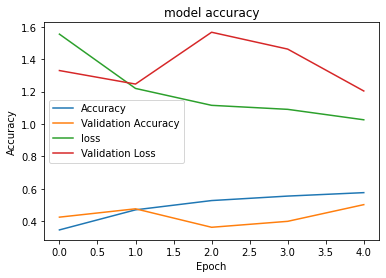

In [36]:
import matplotlib.pyplot as plt
plt.plot(lets_do.history["accuracy"])
plt.plot(lets_do.history['val_accuracy'])
plt.plot(lets_do.history['loss'])
plt.plot(lets_do.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()